<h1> Oberservations </h1>

<ol>
<li> Number of Rides in the Urban cities was more compared to Rural area. </li>
<li> Even thought city wise Average Fares were higher in he Rural vs Urban, but the total Fare was higher Urban Cities. </li> 
<li> Suburban ares had better of both, more rides and higher fares, but the fares weren't much higher than the Urban areas, so the Total Fare collection was higher in the Urban cities. </li>    
</ol> 


In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cityPath = os.path.join("raw_data", "city_data.csv")
ridePath = os.path.join("raw_data", "ride_data.csv")

city_data = pd.read_csv(cityPath)
ride_data = pd.read_csv(ridePath)

In [31]:
# city_data.head(), ride_data.head()

In [32]:
avg_fare_by_city = ride_data.groupby("city")["fare"].mean().reset_index()


In [33]:
avg_fare_by_city.columns = ["city","avg_fare"]

In [34]:
# avg_fare_by_city.head()

In [35]:
rides_by_city = ride_data.groupby("city")["ride_id"].count().reset_index()
rides_by_city.columns = ["city","number_of_rides"]

In [36]:
# rides_by_city.head()

In [37]:
# driver count by city was given in this data, but just in case of duplicates
drivers_by_city = city_data.groupby("city")["driver_count"].sum().reset_index()  
drivers_by_city.columns = ["city","driver_count"]
# drivers_by_city.head()

In [10]:
city_sum_inter = pd.merge(avg_fare_by_city,rides_by_city,on="city")
city_sum = pd.merge(city_sum_inter,city_data,on="city")
city_sum.head()
bp_city_sum = city_sum.drop(columns="city").reset_index(drop=True)
bp_city_sum = city_sum.drop(columns="city").reset_index(drop=True)
bp_city_sum.head()

,avg_fare,number_of_rides,driver_count,type
0,23.928710,31,21,Urban
1,20.609615,26,67,Urban
2,37.315556,9,16,Suburban
3,23.625000,22,21,Urban
4,21.981579,19,49,Urban


In [11]:
fare_range_int = (city_sum["avg_fare"].max() - city_sum["avg_fare"].min())/10
fare_min = city_sum["avg_fare"].min()
fare_max = city_sum["avg_fare"].max()
y_axis = np.arange(fare_min, fare_max , fare_range_int)

(0, 60)

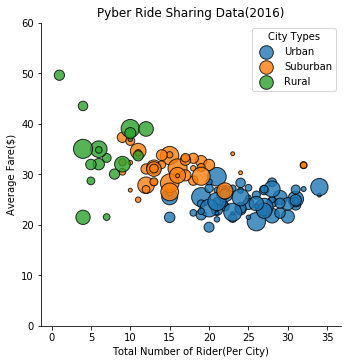

In [30]:
# plt.scatter(city_sum["number_of_rides"], city_sum["avg_fare"], marker="o", facecolors="red", 
#             edgecolors="black", s=city_sum["driver_count"] * 5, alpha=1)
# plt.figure(figsize=(20,10))
sns.lmplot(x="number_of_rides", y="avg_fare", data=bp_city_sum, hue="type", fit_reg=False,  
           scatter_kws={'s':bp_city_sum["driver_count"] * 5, 'edgecolor':'black'}, legend=False)
plt.xlabel("Total Number of Rider(Per City)")
plt.ylabel("Average Fare($)")
plt.legend(title="City Types", loc="upper right")
plt.title("Pyber Ride Sharing Data(2016)")
plt.ylim(0,60)




In [13]:
total_fare = ride_data["fare"].sum()
total_fare

63651.31

In [14]:
city_ride_data = pd.merge(city_data,ride_data,on="city")
city_ride_data.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


In [15]:
fare_by_city_type = city_ride_data.groupby("type")["fare"].sum().reset_index()
fare_by_city_type.columns = ["type", "total_fare_city"]
fare_by_city_type["percent_fare_by_city_type"] = pd.to_numeric(fare_by_city_type["total_fare_city"] * 100 / total_fare)

In [16]:
fare_by_city_type

,type,total_fare_city,percent_fare_by_city_type
0,Rural,4255.09,6.68500
1,Suburban,20335.69,31.94858
2,Urban,40078.34,62.96546


In [17]:
rides_by_city_type = city_ride_data.groupby("type")["ride_id"].count().reset_index()
rides_by_city_type.columns = ["type","rides_by_city_type"]
rides_by_city_type["percent_rides_by_city_type"] = pd.to_numeric(rides_by_city_type["rides_by_city_type"] * 100 / len(city_ride_data))

In [18]:
rides_by_city_type

,type,rides_by_city_type,percent_rides_by_city_type
0,Rural,125,5.193187
1,Suburban,657,27.295388
2,Urban,1625,67.511425


In [19]:
drivers_by_city_type = city_data.groupby("type")["driver_count"].sum().reset_index()
drivers_by_city_type.columns = ["type","drivers_by_city_type"]
drivers_by_city_type["percent_drivers_by_city_type"] = pd.to_numeric(drivers_by_city_type["drivers_by_city_type"] * 100/ city_data["driver_count"].sum())
drivers_by_city_type

,type,drivers_by_city_type,percent_drivers_by_city_type
0,Rural,104,3.105405
1,Suburban,638,19.050463
2,Urban,2607,77.844133


In [20]:
# type(rides_by_city_type),type(fare_by_city_type)
type_data_inter = pd.merge(rides_by_city_type,fare_by_city_type,on="type")
type_data = pd.merge(type_data_inter,drivers_by_city_type,on="type")
type_data

,type,rides_by_city_type,percent_rides_by_city_type,total_fare_city,percent_fare_by_city_type,drivers_by_city_type,percent_drivers_by_city_type
0,Rural,125,5.193187,4255.09,6.68500,104,3.105405
1,Suburban,657,27.295388,20335.69,31.94858,638,19.050463
2,Urban,1625,67.511425,40078.34,62.96546,2607,77.844133


Text(0.5,1,'% of Total Fares by City Type')

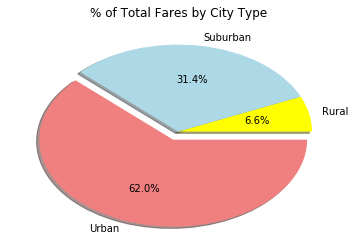

In [21]:
colors = ["yellow","lightblue","lightcoral"]

explode = (0,0,0.1)

plt.pie(type_data["percent_fare_by_city_type"], explode=explode, labels=type_data["type"], colors=colors,
        autopct="%1.1f%%",shadow=True, )
plt.title("% of Total Fares by City Type")

Text(0.5,1,'% of Total Rides by City Type')

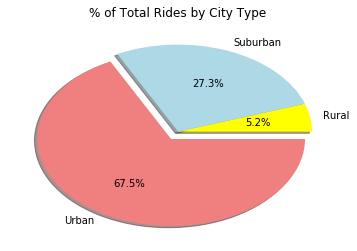

In [22]:
plt.pie(type_data["percent_rides_by_city_type"], explode=explode, labels=type_data["type"], colors=colors,
        autopct="%1.1f%%",shadow=True, )
plt.title("% of Total Rides by City Type")

Text(0.5,1,'% of Total Drivers by City Type')

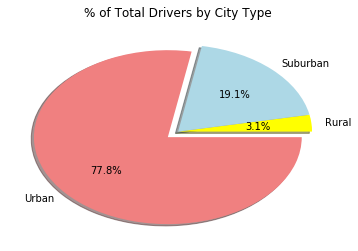

In [23]:
plt.pie(type_data["percent_drivers_by_city_type"], explode=explode, labels=type_data["type"], colors=colors,
        autopct="%1.1f%%",shadow=True, )
plt.title("% of Total Drivers by City Type")